<a href="https://colab.research.google.com/github/ehsanem/Tensorflow/blob/main/TensorflowFundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# Types of tensors
**scaler:** It is just a number or numbers

**vector:** A series of numbers with direction

**matrix:** A two-dimensional array of numbers

**tensor:** An n-dimensional array of numbers

#Working with Tensors


## Methods of creating tensors
Two methods to create tensors

In [ ]:
tf.constant()
tf.variable()

##Methods of getting tensor info

In [ ]:
.ndim : returns number of columns
.shape : returns tensor shape : ([x,y,z]) where x is the number of samples, y is number of rows in each sample and z is number of features.
.size: returns the number of all elements in the tensor

##Change an element value in a tensor
We can change an element of a variable tensor. In order to change an element of a variable tensor we have to use **.assign** method:

In [ ]:
change_element = tf.variable([[[1,2,2],
[2,5,5],
[8,9,9],
[5,7,7]],[[1,2,2],
[2,5,5],
[8,9,9],
[5,7,7]]])

change_element[0][0][0].assign(0)

##Creating random tensor
We need to create random tensor for the first time of model building. This random tensor would be the tensor of weights:

In [ ]:
random_1 = tf.random.Generator.from_seed(42)
tf.constant(np.random.randint(0,100,size=50))

##Creating random tensor with a distribution

###Normal distribution

In [ ]:
random_1.normal(shape = (3,2))

###Uniform distribution

In [ ]:
random_1.normal(shape = (3,2))

##Shuffle tensor data
There are two setting for shuffling seed:
1. global seed
2. operation seed:


In [ ]:
tf.random.set_seed(42) (global)
tf.random.shuffle(random_1,seed=42) (operational)

##Add an extra dimension to a tensor

###tf.newaxis

In [ ]:
example = tensor[...,tf.newaxis]

###tf.expand_dims

In [ ]:
example = tf.expand_dims(tensor, axis=0)
# the axis can be anything: -1, 0, 1,...

##Tensor Basic Operations

In [ ]:
tf.multiply(tensor, 10)
tf.add(tensor, 10)

##Tensor dot product

In [ ]:
tf.matmul(tensor1, tensor2)
tf.tensordot(tensor1, tensor2)

##Tensor Transpose

In [ ]:
tf.transpose(tensor1)

##Tensor reshape

In [ ]:
tf.reshape(tensor, shape=(2,3))

##Tensor datatype precision

In [ ]:
tf.cast(tensor, dtype = tf.float16)

##Tensor Aggregation

###absolute values

In [ ]:
tf.abs(tensor)

###minimum

In [ ]:
tf.reduce_min(tensor)

###max

In [ ]:
tf.reduce_max(tensor)

###mean

In [ ]:
tf.reduce_mean(tensor)

###sum

In [ ]:
tf.reduce_sum(tensor)

###std

In [ ]:
tf.reduce_std(tensor)

###variance

In [ ]:
tf.reduce_variance(tensor)

##Finding max/min value & its index in a tensor

In [ ]:
tf.argmax(tensor)
tf.argmin(tensor)
tensor[tf.argmax(tensor)]
tensor[tf.argmax(tensor)] == tf.reduce_max(tensor)

##Squeezing Tensor
It means removing all one dimension:

In [ ]:
tf.squeeze(tensor)

##One-hot encoding

In [ ]:
tf.one_hot(tensor, depth = 0,1,2,3,...)
tf.one_hot(tensor, depth= 0,1,2,3,..., on_value = 'lablalbl' off_value = 'bfbfbfbf')

##Tensor math operation

In [ ]:
tf.square(tensor)
tf.sqrt(tensor)

---
**NOTE**

 ***If we create a tensor from a NumPy array, the data is 
float64 but when we create it with TensorFlow it would be float32***

---

##Check CPU/GPU

In [ ]:
tf.config.list_physical_devices

#Model creation steps

1. create sequential object
2. add layers of the neural network
3. compile: set hyperparameters
4. fit the model to the dataset
5. use predict to evaluate the model

EXAMPLE


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='Adam', loss='mae', metrics='mae')

model.fit(X_train_tensor, y_train_tensor, epochs=100)

Define a model while creating the sequential object

In [ ]:
model = tf.keras.Sequential(
[
tf.keras.layers.Dense(100),
tf.keras.layers.Dense(1)
])

##1. Create model object

In [ ]:
model = tf.keras.sequential()

##2. Add layers(method of model object)
There are many types of layers and we can use them based on the type of problem that we are facing with.

Built-in layers in TF are:
https://www.tensorflow.org/api_docs/python/tf/keras/layers


###Dense Layer
The most common is Dense layer. It is called dense because all neurons are connected to each other.

A layer can be added to the model with the following syntax:

In [ ]:
model.add(tf.keras.layers.Dense(...))

####Dense layer parameters
1. **units**: Number of neurons in the layer (type:integer)
2. **activation**: a function that decides whether the input is important enough to be allowed to enter the next level of the modelling.(type: string)
There are **16 types** of built-in activation functions (the famous one is Relu):
https://www.tensorflow.org/api_docs/python/tf/keras/activations
3. **use_bias**: whether the weight matrix for this layer uses bias vector or not.(type: Boolean)
4. **kernel_initializer**: weight matrix initializer. It can be an initialized matrix with a specified distribution.(type:Tensor) There are 31 types of built-in distributions in the TF:https://www.tensorflow.org/api_docs/python/tf/keras/initializers
5. **bias_initializer**: a matrix for bias values (b values) of the loss function (f=ax+b) (type: Tensor)
6. **kernel_regularizer**: Regularizers are a set of rules to apply penalties during optimization. They are part of the loss function. There are 3 types of built-in regularizers and also it is possible to define custom regularizers:**L1, L2, L!L2**

EXAMPLE


```
layer = layers.Dense(
units=64,
kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
bias_regularizer=regularizers.L2(1e-4),
activity_regularizer=regularizers.L2(1e-5)
)
```

7. **bias_regularizer**: Same as above but apply to bias value
8. **activity_regularizer**: regularizer for a layer's output
9. **kernel_constraint**: Apply constraint on model weights matrix. for example non-negative constraint.
There are built-in weight constraints: **MaxNorm,
MinMaxNorm,
NonNeg,
UnitNorm**
10. **Radial Constraint**: It is possible to define a custom constraint
11. **bias_constraint**: Same as above but apply to bias values


##3. Compile (method of model object)
After adding layers to the model, we need to define the hyperparameters of the model. For this purpose, we have to use compile method.

EXAMPLE

In [ ]:
model.compile(optimizer='Adam', loss='mae', metrics='mae')

###Complie parameters
1. **optimizer**(type:string): An optimizer is a method which uses to converge the minimum points. There are different types of optimizers: **Adadelta,
adagrad,
Adam,
Adamax,
Ftrl,
Nadam,
Optimizer,
RMSprop,
SGD**
2. **loss** (type:string): The loss function is used to optimize the model. This is the function that will get minimized by the optimizer. A function which calculates the difference between real value and predicted .There are 18 different types of optimizers:
https://www.tensorflow.org/api_docs/python/tf/keras/losses
3. **metric**(type:string): A metric is used to judge the performance of the model.
There are 43 different types of metrics:
https://www.tensorflow.org/api_docs/python/tf/keras/metrics
4. **loss_weights**
5. **weighted_metrics**
6. **run_eagerly**
7. **steps_per_execution**
8. **jit_compile**

# New Section

##4. Fit(method of model object)
EXAMPLE
```
model.fit(X_train_tensor, y_train_tensor, epochs=100)
```


##fit parameters
1. **x**
2. **y**
3. **batch_size**: The fraction of all training samples which the network uses to train the model in each epoch.
There are 3 technics for batch size selection:
  **Batch**: uses all samples in a single batch
  ; **Mini-batch**: divide the dataset into batches with equal samples except for the last batch, which contains the remaining samples. for example, 14 samples with 3 batches will be: 5 - 5 - 4
  ; **Stochastic**: each sample is a batch

4. **epochs**: The number of times that all training samples used to train the model
5. **verbose**: The explanation of fit process. accepted values: 0, 1, 2
6. **callbacks**: Callback is a very important property of fit method. the config of callback has a direct impact on the model accuracy.
7. **validation_split**: the fraction of training data for validation. between 0 and 1.
8. **validation_data**: validation dataset
9. **shuffle**: shuffle the training data before each epoch. BOOLEAN
10. **class_weight**
11. **sample_weight**
12. **initial_epoch**
13. **steps_per_epoch**
14. **validation_steps**
15. **validation_batch_size**
16. **validation_freq**
17. **max_queue_size**
18. **workers**
19. **use_multiprocessing**

##Other model methods
5. **call**: Calls the model on new inputs
**compute_loss**: Compute the total loss in the training mode,
6. **compute_metric**: update metrics
7. **evaluate**: Returns the loss value & metrics values for the model in test mode
8. **load_weights**: load saved weights from previously built models.
9. **save**
10. **to_json**
11. **To_yaml**
12. **summary**



---

**NOTE**

***evaluate gives the loss value but, predict only gives the predicted values***

---
**NOTE**

***There are other methods for model but the most useful ones are mentioned***

#Save and load models
Create a function to build model:

In [ ]:
def create_model():
  model = tf.keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])
  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.metrics.SparseCategoricalAccuracy()])

  return model

##Save model weights
Use callbacks to save model weights during training. In TF it calls checkpoints:


In [ ]:
model = create_model()

cp_callback = tf.keras.callbacks.ModelCheckpoint(file_path=..., save_weights_only = True,
Verbose=1,
save_freq=5*batch_size
)

model.fit(X_train, y_train, epochs = 10, callbacks = [cp_callback])

**save_freq** save weights every 5 epoches

##Load model weights
It is possible to use saved weights for any model with similar architecture.

In [ ]:
model = create_model()
model.load_weights(checkpoint_file_path)


##Save entire model
Default model file save in SavedModel format

In [ ]:
model = create_model()
model.save(file_path)

Model also can be saved in HDF5 format

In [ ]:
model = create_model()
model.save(filename.h5)

##Load entire model

In [ ]:
new_model = tf.keras.models.loads_model(model_file)
new_model.summary()


##Download from Colab

In [ ]:
from google.colab import files
files.download(path)

In [ ]:
Or copy a file from one place to another

In [ ]:
!cp origin_path destination_path

#DL experiments tracking tools (TF plugin)
1. TensorBoard
2. Weights and Biases



#Review with an example

In [58]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.2 MB/s 


In [68]:
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


##Load Dataset

In [ ]:
original_dataset=load_boston()

In [38]:
#split dataset into train and test set
print(original_dataset.keys())
X=pd.DataFrame(original_dataset['data'], columns = [original_dataset['feature_names']])
y = original_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


##Original dataset visualization 

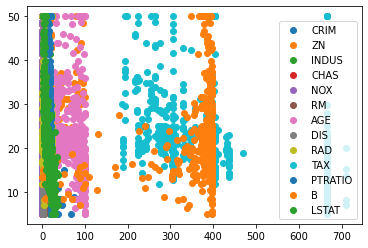

In [82]:
for x_value in original_dataset['feature_names']:
  plt.scatter(X[x_value], y, label=x_value)
plt.legend()

##Initiate sequential object 

In [40]:
model = tf.keras.Sequential()

##Add Layers

In [41]:
model.add(
    tf.keras.layers.Dense(1),
    )

##Compile

In [65]:
model.compile(optimizer = 'SGD', loss = 'mae', metrics = 'mae')

##Fit

In [66]:
model.fit(X_train, y_train, epochs=1, batch_size=100)

5/5 [==============================] - 0s 4ms/step - loss: 1441.6230 - mae: 1441.6230


In [67]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 2020.8700 - mae: 2020.8700


[2020.8699951171875, 2020.8699951171875]

In [73]:
def plot(x_value):
  plt.scatter(x_value, y)


In [81]:
original_dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [72]:
print(original_dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu